<a href="https://colab.research.google.com/github/DKorchagina/industrial-development-git-control-task/blob/main/regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Корчагина Дарья, ИВТ-41БО
##Линейная регрессия. Задание


###Task
В таблице∗
есть результаты замеров ширины (столбец A) и длины (столбец B) листовой пластины одного из видов орхидей. По результатам 20 замеров постройте
уравнение линейной регрессионной зависимости длины листовой пластины от ширины. Проверьте значимость уравнения регрессии и отдельных коэффициентов.



In [15]:
import xlrd
import openpyxl
import time
time.clock = time.time
a, b = [], []
rb = xlrd.open_workbook('/content/drive/MyDrive/Colab Notebooks/terver/Практика 8.02 - данные для самостоятельного анализа.xls', formatting_info=True)
sheet = rb.sheet_by_index(0)
for rownum in range(sheet.nrows):
  row = sheet.row_values(rownum)
  a.append(row[0])
  b.append(row[1])
a, b

([3.1,
  2.6,
  4.5,
  2.5,
  4.5,
  2.7,
  3.9,
  4.8,
  4.5,
  3.2,
  3.3,
  4.1,
  3.1,
  2.7,
  4.2,
  4.5,
  3.5,
  4.9,
  2.9,
  3.7],
 [4.5,
  3.6,
  7.0,
  3.8,
  6.5,
  4.0,
  6.1,
  7.2,
  6.7,
  4.5,
  5.1,
  6.1,
  4.5,
  4.5,
  6.2,
  6.9,
  5.2,
  7.5,
  4.3,
  5.5])

Задача: по набору (a, b) построить уравнение линейной регрессиии y = ax + b

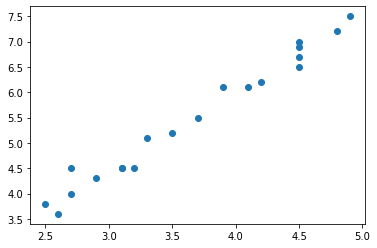

In [17]:
import matplotlib.pyplot as plt
plt.scatter(a, b)
plt.show()

In [18]:
import numpy as np
mean_a = np.mean(a)
mean_b = np.mean(b)
sr_otkl_a = np.std(a)
sr_otkl_b = np.std(b)
mean_a, mean_b, sr_otkl_a, sr_otkl_b

(3.66, 5.485, 0.7774316690230725, 1.2080045529715524)

In [20]:
import scipy.stats as st
r_v = st.pearsonr(a,b)
r_v = r_v[0]
r_v

0.9880305557372465

In [21]:
koef_a = r_v*sr_otkl_b/sr_otkl_a
koef_b = mean_b - r_v*sr_otkl_b*mean_a/sr_otkl_a
koef_a, koef_b

(1.5352415618795496, -0.13398411647915154)

In [27]:
print("Уравнение линейной регрессии: y = " + str(koef_a) + 'x + ' + str(koef_b))

Уравнение линейной регрессии: y = 1.5352415618795496x + -0.13398411647915154


In [34]:
import math
summa = 0
for i in range(20):
  summa += (b[i] - koef_a*a[i]-koef_b)**2
s_ost = math.sqrt(summa/18)
s_a = s_ost/(sr_otkl_a*math.sqrt(20))
mean_x2 = 0
for i in range(20):
  mean_x2 += a[i]**2
mean_x2 /= 20
s_b = s_ost*mean_x2/(sr_otkl_a*math.sqrt(20))
t_a = koef_a/s_a
t_b = koef_b/s_b
t_a, t_b

(27.174283839029794, -0.16939737235267124)

In [35]:
t_krit = 2.1009
if (abs(t_a)<t_krit):
  print('Коэффициент а незначим')
if (abs(t_b)<t_krit):
  print('Коэффициент b незначим')

Коэффициент b незначим
